# TASK-3 : CREDIT SCORING MODEL

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
data = pd.read_excel("credit_data.xlsx")
print(data.head())

   ID  Income   Debt  Payment_History  Age Credit_Score
0   1   40000  10000                1   25         Good
1   2   25000   8000                0   22          Bad
2   3   60000  15000                1   35         Good
3   4   30000  12000                0   28          Bad
4   5   75000  20000                1   40         Good


## Data Summary

In [4]:
print(data.describe())
print("\nCredit Score Distribution:\n", data['Credit_Score'].value_counts())

              ID        Income          Debt  Payment_History        Age
count  25.000000     25.000000     25.000000        25.000000  25.000000
mean   13.000000  49920.000000  15240.000000         0.520000  31.880000
std     7.359801  22274.649268   6728.546153         0.509902   8.992219
min     1.000000  25000.000000   5000.000000         0.000000  21.000000
25%     7.000000  30000.000000  10000.000000         0.000000  25.000000
50%    13.000000  45000.000000  15000.000000         1.000000  28.000000
75%    19.000000  70000.000000  20000.000000         1.000000  39.000000
max    25.000000  90000.000000  30000.000000         1.000000  50.000000

Credit Score Distribution:
 Credit_Score
Good    13
Bad     12
Name: count, dtype: int64


## Rule-Based Model (Simulating Credit Scoring)

In [5]:
def predict_credit(row):
    score = 0
    if row['Income'] > 50000:
        score += 1
    if row['Debt'] < 15000:
        score += 1
    if row['Payment_History'] == 1:
        score += 1
    return "Good" if score >= 2 else "Bad"
data['Predicted'] = data.apply(predict_credit, axis=1)
print(data[['Income', 'Debt', 'Payment_History', 'Credit_Score', 'Predicted']].head(10))

   Income   Debt  Payment_History Credit_Score Predicted
0   40000  10000                1         Good      Good
1   25000   8000                0          Bad       Bad
2   60000  15000                1         Good      Good
3   30000  12000                0          Bad       Bad
4   75000  20000                1         Good      Good
5   28000   5000                0          Bad       Bad
6   50000  12000                1         Good      Good
7   45000  20000                0          Bad       Bad
8   80000  25000                1         Good      Good
9   32000  15000                0          Bad       Bad


## Accuracy Check

In [6]:
accuracy = np.mean(data['Credit_Score'] == data['Predicted'])
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


## Visualization

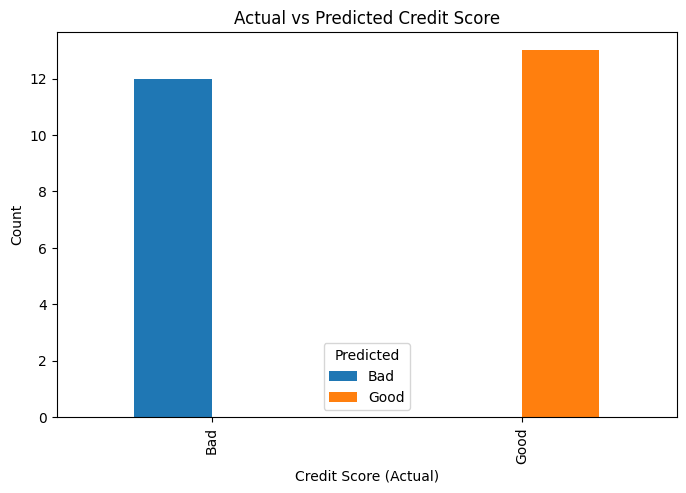

In [7]:
# Actual vs Predicted count plot
counts = data[['Credit_Score','Predicted']].value_counts().unstack()
counts.plot(kind='bar', figsize=(8,5))
plt.title("Actual vs Predicted Credit Score")
plt.xlabel("Credit Score (Actual)")
plt.ylabel("Count")
plt.show()